In [304]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-housing-market-factors/Annual_Macroeconomic_Factors.csv
/kaggle/input/usa-housing-market-factors/Housing_Macroeconomic_Factors_US (2).csv
/kaggle/input/usa-housing-market-factors/Monthly_Macroeconomic_Factors.csv
/kaggle/input/monthly-macroeconomic-factors-v2/Monthly_Macroeconomic_Factors_v2.csv


In [305]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faryarmemon/usa-housing-market-factors")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/usa-housing-market-factors


In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/monthly-macroeconomic-factors-v2/Monthly_Macroeconomic_Factors_v2.csv')
df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP_Value,Mortgage_Rate,Real_Disposable_Income
0,1/1/87,63.735,14.97068,46.91647,153968000,6.6,8986.367000,9.2040,6159.5
1,2/1/87,64.134,15.86818,47.08523,154123000,6.6,9018.663333,9.0825,6192.1
2,3/1/87,64.470,16.48206,47.29619,154229000,6.6,9050.959667,9.0350,6200.0
3,4/1/87,64.974,16.22884,47.54933,154362000,6.3,9083.256000,9.8325,5967.2
4,5/1/87,65.549,16.14232,47.71810,154490000,6.3,9109.512000,10.5960,6209.1


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    423 non-null    object 
 1   House_Price_Index       423 non-null    float64
 2   Stock_Price_Index       423 non-null    float64
 3   Consumer_Price_Index    423 non-null    float64
 4   Population              423 non-null    int64  
 5   Unemployment_Rate       423 non-null    float64
 6   Real_GDP_Value          423 non-null    float64
 7   Mortgage_Rate           423 non-null    float64
 8   Real_Disposable_Income  423 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 29.9+ KB


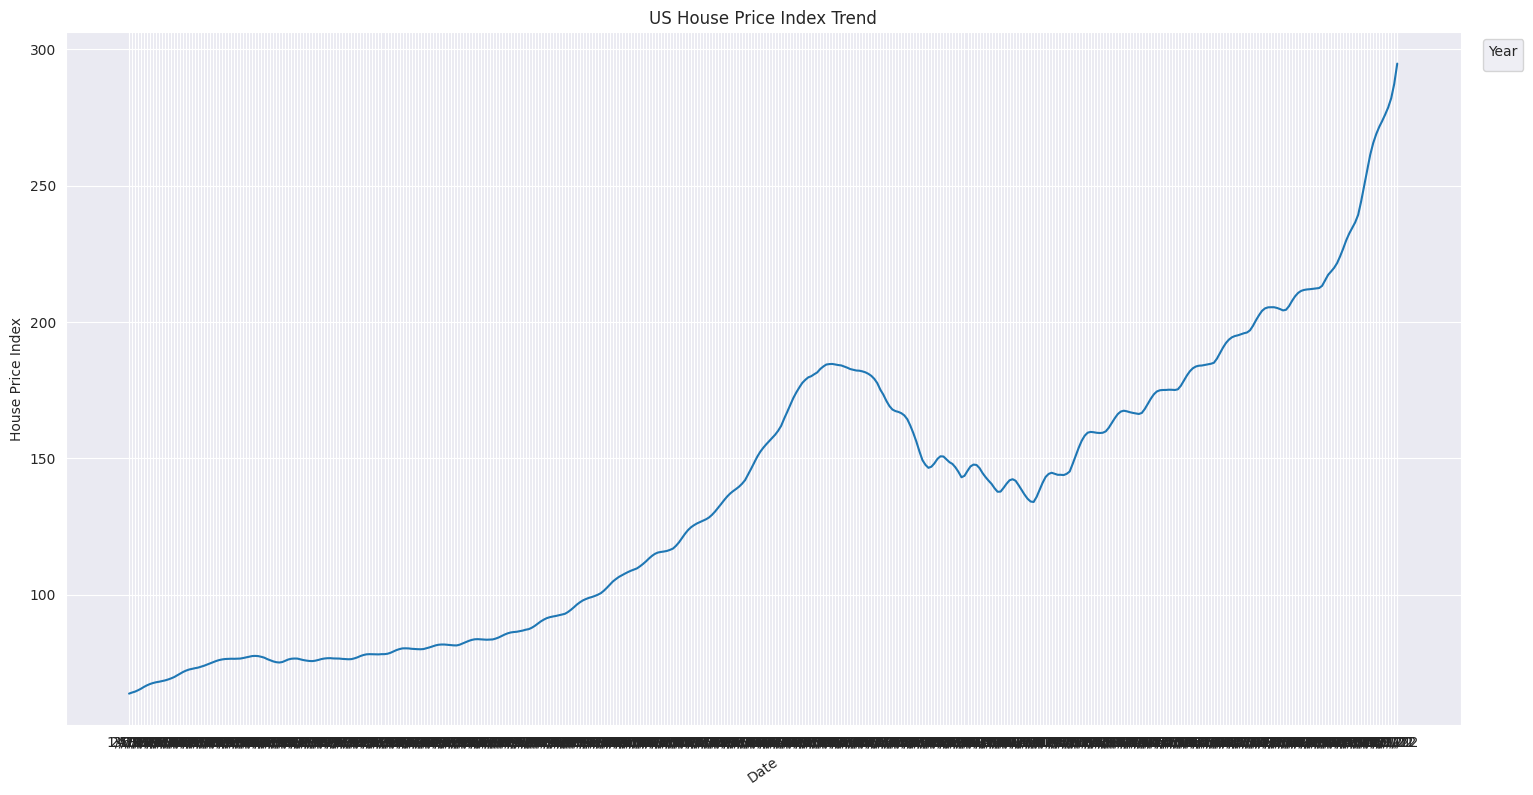

In [308]:
#EDA
sns.set_style("darkgrid")

plt.figure(figsize=(18,9))
sns.lineplot(data=df, x='Date', y="House_Price_Index")
plt.title("US House Price Index Trend")
plt.xlabel('Date', rotation=35)
plt.ylabel('House Price Index')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='best')
plt.show()
    

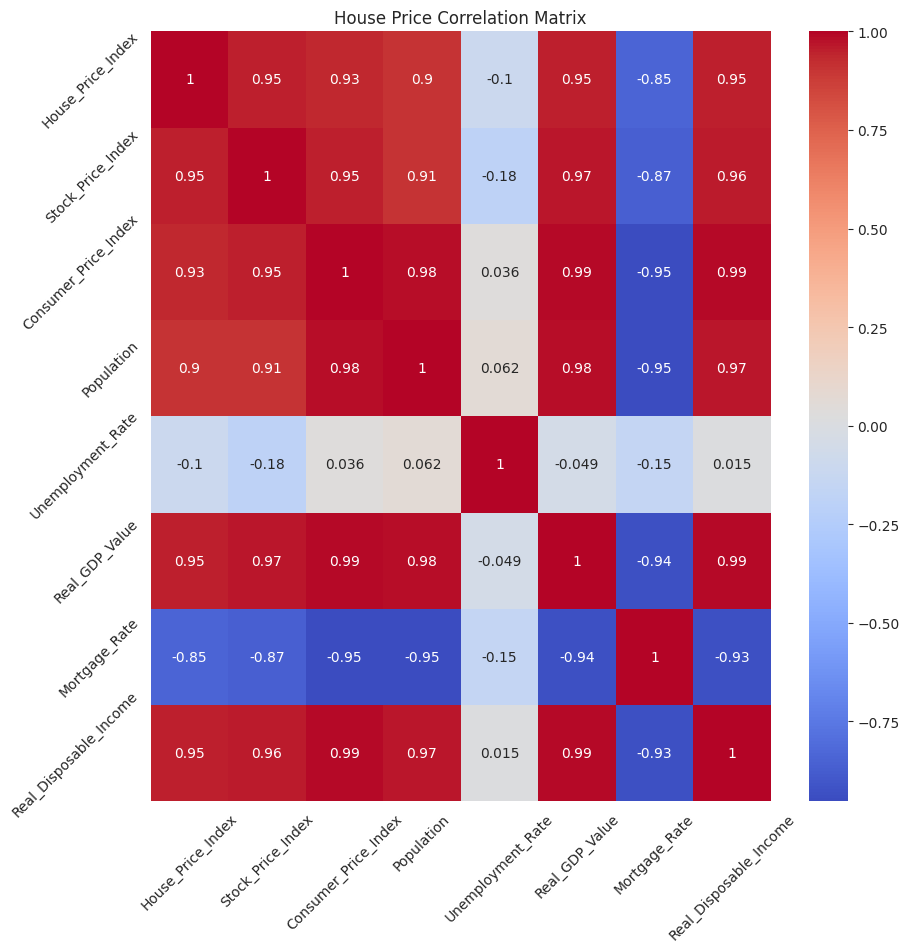

In [309]:
df_num = df.drop(['Date'], axis=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

price_matrix=df_scaled.corr()
plt.figure(figsize=(10, 10)) 
ax=sns.heatmap(price_matrix, annot=True,cmap='coolwarm')
plt.title("House Price Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [310]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

X = df_num.drop('House_Price_Index', axis = 1)
y = df_num['House_Price_Index']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


best_predictor = None
best_r_squared = 0

date_drop = df_num.corr()['House_Price_Index'].drop('House_Price_Index')
sorted_matrix= date_drop.abs().sort_values(ascending=False)
rank = sorted_matrix.head(10).index.tolist()
print(rank)

y = df_num["House_Price_Index"]
X = df_num.drop(columns = ["House_Price_Index"])
X_con = sm.add_constant(X)
model_poly=sm.OLS(y,X_con).fit()
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test, has_constant='add')
model = sm.OLS(y_train, X_train_const).fit()
train_r2 = model.rsquared
test_r2 = r2_score(y_test, model.predict(X_test_const))
print(train_r2)
print(test_r2)

['Real_GDP_Value', 'Stock_Price_Index', 'Real_Disposable_Income', 'Consumer_Price_Index', 'Population', 'Mortgage_Rate', 'Unemployment_Rate']
0.9298375180387128
0.9576752138188811


In [311]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline


In [312]:
results = []

models = [
    #('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor()),
    ('DecisionTree', DecisionTreeRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42, n_jobs=-1)), 
    ('AdaBoost', AdaBoostRegressor(n_estimators=100, learning_rate=0.8, random_state=42)),
    ('GradientBoost', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR())
    
]

for name, model in models:
    if name in ['SVR', 'KNN']:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2': r2,
        'MSE': mse     
    })
    
#print(f"Model: LinearRegression, R2:{test_r2}, MSE: {mse_lr}")
print(results)

#Models have good performance: Decision tree, Random forest, gradient boost
# good R2 but large MSE: Linear regression, KNN, ada boost
# SVR doesn't perform well

[{'Model': 'RandomForest', 'R2': 0.9989755036706126, 'MSE': 3.580992132015289}, {'Model': 'KNN', 'R2': 0.9991244845219986, 'MSE': 3.0602491665882328}, {'Model': 'DecisionTree', 'R2': 0.997758149649296, 'MSE': 7.836092952941173}, {'Model': 'RandomForest', 'R2': 0.9989755036706126, 'MSE': 3.5809921320152878}, {'Model': 'AdaBoost', 'R2': 0.9905865969532021, 'MSE': 32.90331188031597}, {'Model': 'GradientBoost', 'R2': 0.9987102025101056, 'MSE': 4.508317434350395}, {'Model': 'SVR', 'R2': 0.6827626348815008, 'MSE': 1108.861472592988}]


In [313]:
# But random split may not making sense, it is time serial data

In [314]:
# train test split based on time
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

test_start_date = "2013-12-01"
test_end_date = "2019-12-01"

train_data = df[df['Date'] < test_start_date].copy()
test_data = df[(df['Date'] >= test_start_date) & (df['Date'] < test_end_date)].copy()

#Original Real_GDP is year to year changes,GDP is quarterly, I used linear to calculate montly GDP. GDP, CPI, population and Real desposable income, are highly correlated.
#Since the GDP montly is estimate, we only need one out of these four, by testing the result, let's keep Real disposable income.
selected_features = ['Real_GDP_Value','Stock_Price_Index', 'Consumer_Price_Index', 'Population', 'Real_Disposable_Income', 
                     'Unemployment_Rate', 'Mortgage_Rate']
target = 'House_Price_Index'

X_train = train_data[selected_features]
y_train = train_data[target]
X_test = test_data[selected_features]
y_test = test_data[target]

print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

     Real_GDP_Value  Stock_Price_Index  Consumer_Price_Index  Population  \
0       8986.367000           14.97068              46.91647   153968000   
1       9018.663333           15.86818              47.08523   154123000   
2       9050.959667           16.48206              47.29619   154229000   
3       9083.256000           16.22884              47.54933   154362000   
4       9109.512000           16.14232              47.71810   154490000   
..              ...                ...                   ...         ...   
318    17860.450000           88.49967              98.55664   202303000   
319    17912.349000           88.94304              98.67520   202352000   
320    17964.248000           90.11507              98.78996   202458000   
321    18016.147000           92.16814              98.53555   202494000   
322    17995.422670           94.64921              98.33430   202569000   

     Real_Disposable_Income  Unemployment_Rate  Mortgage_Rate  
0                    61

In [315]:
#Scaler
# Linear Regression
X_train_origin = X_train
X_test_origin = X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression (OLS)")
print(f" RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Linear Regression (OLS)
 RMSE: 70.4209, MSE: 4959.0984, MAE: 60.0683, R2: -17.6727


In [316]:
# KNN
#Test different N neighbors [1,3,5,7,9,11], n_neighbors = 5 is the best but same as the above.
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2, n_jobs=-1)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("KNN")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

KNN
 RMSE: 27.4045, MAE: 23.8467, MAPE: 12.2823%, R2: -1.8278


In [317]:
# Decision Tree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
mape = mean_absolute_percentage_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Decision Tree
 RMSE: 25.0363, MAE: 20.7128, MAPE: 10.5646%, R2: -1.3602


In [318]:
# Decision Tree
# limit the max depth of DT
dt = DecisionTreeRegressor(max_depth= 2,random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
mape = mean_absolute_percentage_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Decision Tree
 RMSE: 20.2179, MAE: 17.5640, MAPE: 9.3141%, R2: -0.5391


In [319]:
# Random forest
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
mape = mean_absolute_percentage_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Decision Tree
 RMSE: 25.0363, MAE: 20.7128, MAPE: 10.5646%, R2: -1.3602


In [320]:
# Random forest
#control max_depth = 2 to improve slightly the R2
rf = RandomForestRegressor(n_estimators= 3, max_depth= 2, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)


print("Random Forest")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Random Forest
 RMSE: 20.4098, MAE: 17.4282, MAPE: 9.1735%, R2: -0.5685


In [321]:
#Adaboost
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ada)
mape = mean_absolute_percentage_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

print("AdaBoost")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

AdaBoost
 RMSE: 20.8640, MAE: 17.6799, MAPE: 9.1178%, R2: -0.6391


In [322]:
#lower the n_estimators to 7 and modify the learning rate to 0.3,result doesn't improve a lot
ada = AdaBoostRegressor(n_estimators=7, learning_rate=0.3, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ada)
mape = mean_absolute_percentage_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

print("AdaBoost")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

AdaBoost
 RMSE: 22.5748, MAE: 19.5968, MAPE: 10.1827%, R2: -0.9189


In [323]:
#Gradient boost

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ada)
mape = mean_absolute_percentage_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boost")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Gradient Boost
 RMSE: 19.6656, MAE: 19.5968, MAPE: 7.8735%, R2: -0.4562


In [324]:
#Gradient boost

#setup learnig rate, estimator and max depth.
gb = GradientBoostingRegressor(random_state=42, learning_rate=0.7, n_estimators=50, max_depth=2)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ada)
mape = mean_absolute_percentage_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boost")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Gradient Boost
 RMSE: 10.2303, MAE: 19.5968, MAPE: 4.4825%, R2: 0.6059


In [325]:
# SVR
# scale features using training data only

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("SVR")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

SVR
 RMSE: 56.7937, MAE: 51.2180, MAPE: 26.5694%, R2: -11.1452


In [326]:
# Get the best param for model
pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

param_grid = {
    'svr__C': [0.1, 1, 10, 20,50, 100, 200, 500, 1000],
    'svr__gamma': ['scale', 'auto', 0.01,0.02, 0.05, 0.1, 0.5, 1, 2]
}

# use TimeSeriesSplit if appropriate:
cv = TimeSeriesSplit(n_splits=5)

gs = GridSearchCV(pipe, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
y_pred_svr = gs.predict(X_test)

mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Best params:", gs.best_params_)
print("SVR")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best params: {'svr__C': 500, 'svr__gamma': 0.02}
SVR
 RMSE: 23.0148, MAE: 21.9540, MAPE: 11.7776%, R2: -0.9944


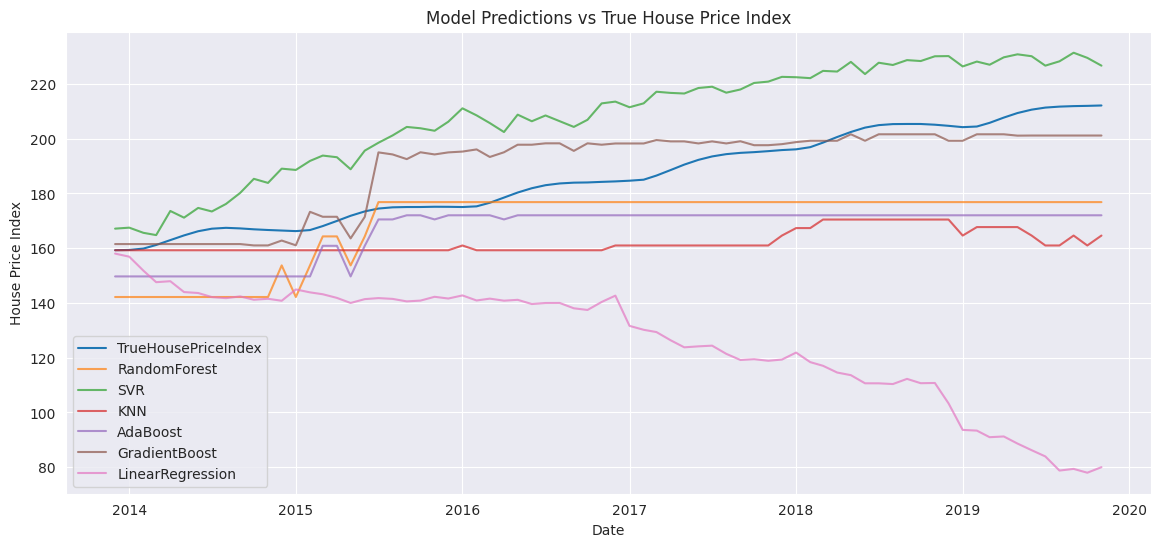

In [327]:
predictions = {
    "RandomForest": y_pred_rf,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn,
    "AdaBoost": y_pred_ada,
    "GradientBoost": y_pred_gb,
    "LinearRegression": y_pred_lr
}
test_index = X_test_origin.index
dates_test = df.loc[test_index, 'Date']

plt.figure(figsize=(14,6))
plt.plot(dates_test, y_test, label="TrueHousePriceIndex")

for name, y_pred in predictions.items():
    plt.plot(dates_test, y_pred, label=name, alpha=0.7)

plt.title("Model Predictions vs True House Price Index")
plt.xlabel("Date")
plt.ylabel("House Price Index")
plt.legend()
plt.show()

In [328]:
#Lasso regression model for correlated features and avoids overfitting
from sklearn.linear_model import Lasso
alphas = np.arange(0.1, 10, 0.1)
results = {'alpha': [], 'r2': [], 'rmse': []}

for alpha in alphas:

    lasso_model = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso_model.fit(X_train, y_train)
    
    y_test_pred = lasso_model.predict(X_test)
    
    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results['alpha'].append(alpha) 
    results['r2'].append(r2)
    results['rmse'].append(rmse)

results_df = pd.DataFrame(results)

print("Lasso Results (R2 and RMSE):")
print(results_df.to_markdown(index=False))

Lasso Results (R2 and RMSE):
|   alpha |         r2 |     rmse |
|--------:|-----------:|---------:|
|     0.1 | -2.74439   | 31.5347  |
|     0.2 | -0.509331  | 20.0212  |
|     0.3 |  0.182797  | 14.7321  |
|     0.4 |  0.398219  | 12.642   |
|     0.5 |  0.391908  | 12.7082  |
|     0.6 |  0.385048  | 12.7796  |
|     0.7 |  0.377708  | 12.8557  |
|     0.8 |  0.369822  | 12.9369  |
|     0.9 |  0.361393  | 13.0231  |
|     1   |  0.352458  | 13.1139  |
|     1.1 |  0.343009  | 13.2092  |
|     1.2 |  0.326574  | 13.3734  |
|     1.3 |  0.29546   | 13.6789  |
|     1.4 |  0.263234  | 13.9882  |
|     1.5 |  0.229789  | 14.3022  |
|     1.6 |  0.195184  | 14.62    |
|     1.7 |  0.159426  | 14.9412  |
|     1.8 |  0.122465  | 15.2662  |
|     1.9 |  0.0980994 | 15.4767  |
|     2   |  0.193048  | 14.6394  |
|     2.1 |  0.331771  | 13.3217  |
|     2.2 |  0.456499  | 12.0143  |
|     2.3 |  0.574346  | 10.6323  |
|     2.4 |  0.674987  |  9.29071 |
|     2.5 |  0.759906  |  7.98525 |

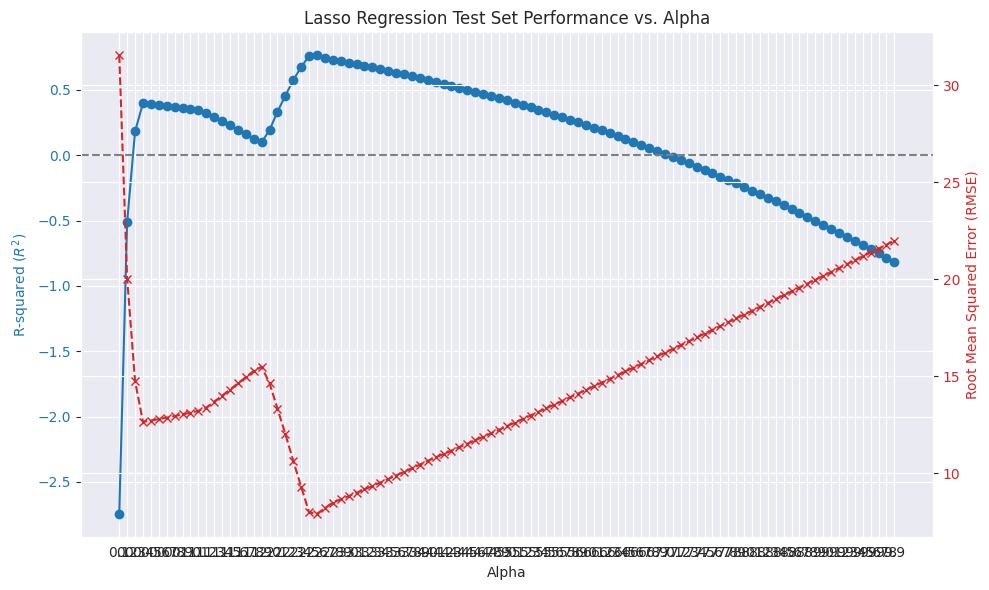

In [329]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color_r2 = 'tab:blue'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R-squared ($R^2$)', color=color_r2)
ax1.plot(results_df['alpha'], results_df['r2'], marker='o', color=color_r2, label='$R^2$')
ax1.tick_params(axis='y', labelcolor=color_r2)

ax1.axhline(0, color='gray', linestyle='--') 
ax1.set_xticks(results_df['alpha']) # Ensure every alpha value is marked

ax2 = ax1.twinx()  
color_rmse = 'tab:red'
ax2.set_ylabel('Root Mean Squared Error (RMSE)', color=color_rmse)  
ax2.plot(results_df['alpha'], results_df['rmse'], marker='x', color=color_rmse, linestyle='--', label='RMSE')
ax2.tick_params(axis='y', labelcolor=color_rmse)

plt.title('Lasso Regression Test Set Performance vs. Alpha')
fig.tight_layout()
plt.show()

In [335]:
lasso_model = Lasso(alpha=2.6, random_state=42)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'r2_train {r2_train}, rmse_train {rmse_train}, r2_test {r2_test}, rmse_test {rmse_test}')

r2_train 0.8517079990955774, rmse_train 14.515909083418656, r2_test 0.7649431047697581, rmse_test 7.90104720220078


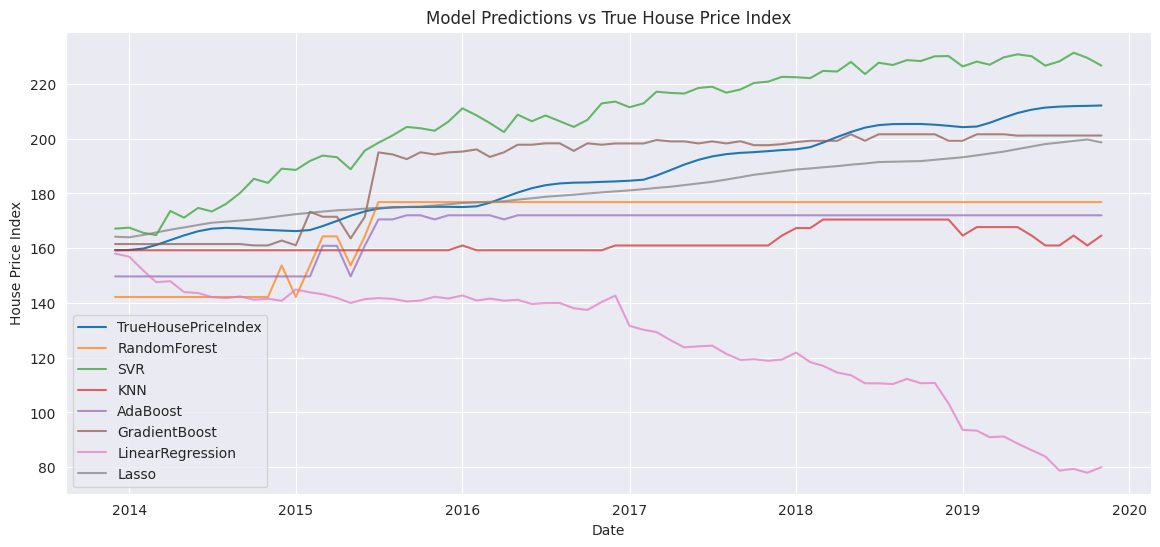

In [338]:
predictions = {
    "RandomForest": y_pred_rf,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn,
    "AdaBoost": y_pred_ada,
    "GradientBoost": y_pred_gb,
    "LinearRegression": y_pred_lr,
    "Lasso": y_test_pred
}
test_index = X_test_origin.index
dates_test = df.loc[test_index, 'Date']

plt.figure(figsize=(14,6))
plt.plot(dates_test, y_test, label="TrueHousePriceIndex")

for name, y_pred in predictions.items():
    plt.plot(dates_test, y_pred, label=name, alpha=0.7)

plt.title("Model Predictions vs True House Price Index")
plt.xlabel("Date")
plt.ylabel("House Price Index")
plt.legend()
plt.show()

In [331]:
#Github link
#https://github.com/meng-shi/supervised_learning.git